In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#придется читать с флешки. я out of memory
history_directory = 'E:\\history\\'
trends_directory = 'E:\\trends_out_dublers_new\\'
colnames = ['<TIME>', '<VOLUME>', '<PRICE>']

price = lambda x : y_column[x] #  функция цены акции от номера тика

def evaluete_1d_list(forecast_window_data, direction):
        '''определяет оценку одномерного массива при зфдфнном направлении
           паттерна. возвращает 1, если цена продолжает движение,
           -1 если возвращается, 0 если остается без движения'''
        if direction == 1: #сопротивление
            Ay = max(forecast_window_data)
            By = min(forecast_window_data)
            Ax = forecast_window_data.index(Ay)
            Bx = forecast_window_data.index(By)
            if Ay > abs(By):
                return 0
            if Ay < abs(By):
                return 1
            else:
                if Ay == By == 0:
                    return -1
                if Ax < Bx:
                    return 0
                else:
                    return 1
        else: # поддержка
            Ay = min(forecast_window_data)
            By = max(forecast_window_data)
            Ax = forecast_window_data.index(Ay)
            Bx = forecast_window_data.index(By)
            if abs(Ay) > By:
                return 0
            if abs(Ay) < By:
                return 1
            else:
                if Ay == By == 0:
                    return -1
                if Ax < Bx:
                    return 0
                else:
                    return 1 

# Иллюстрация к функции оценки паттерна.
![](image)
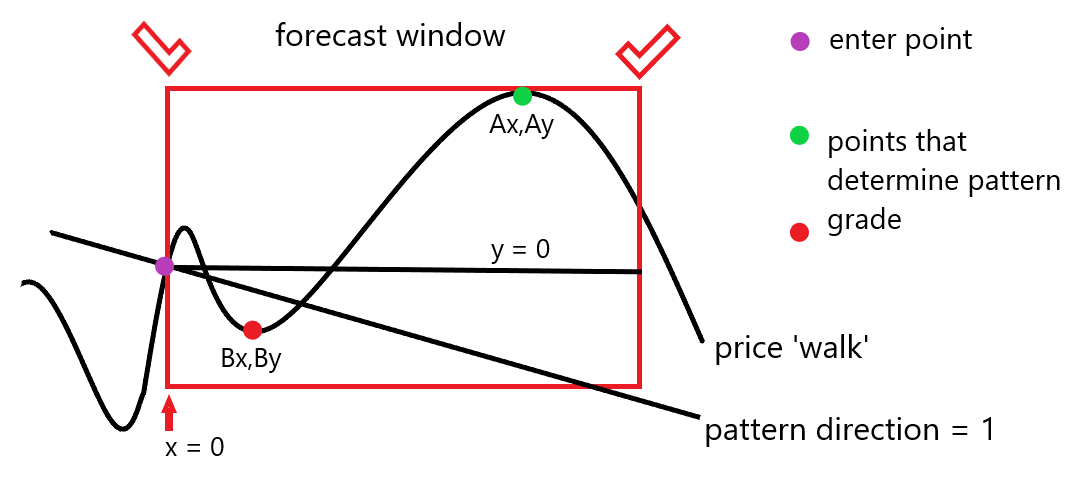

### Пройдем по истории (время жизни контракта - 3 месяца, в каждом дне около 100 000 тиков) и соберем списки с оценками для кажого контракта ([1, 1, 0, 0, 1,...]), игнорируя случаи, где Ay = By = 0.

Начнем с фиксированного окна в будущее = 50 тиков.


In [2]:
grade_list = []
sorted_directory_list = ['trends_outofdublers_TPV_615.csv', 
                         'trends_outofdublers_TPV_915.csv', 'trends_outofdublers_TPV_1215.csv', 
                         'trends_outofdublers_TPV_316.csv', 'trends_outofdublers_TPV_616.csv', 
                         'trends_outofdublers_TPV_916.csv', 'trends_outofdublers_TPV_1216.csv', 
                         'trends_outofdublers_TPV_317.csv', 'trends_outofdublers_TPV_617.csv', 
                         'trends_outofdublers_TPV_917.csv', 'trends_outofdublers_TPV_1217.csv', 
                         'trends_outofdublers_TPV_318.csv', 'trends_outofdublers_TPV_618.csv', 
                         'trends_outofdublers_TPV_918.csv', 'trends_outofdublers_TPV_1218.csv']
for trend_file in sorted_directory_list:
    trend_data = pd.read_csv(trends_directory + trend_file, header= 0, error_bad_lines=False)
    cols = trend_data.columns
    type_of_line = trend_data[cols[0]]# 1 - сопротивление, 2 - поддержка
    start = trend_data[cols[1]]
    end = trend_data[cols[2]]
    corresponding_tick_file_name = history_directory + 'pureSBER' + \
                                   trend_file.split('trends_outofdublers_TPV_')[1]
    tick_data = pd.read_csv(corresponding_tick_file_name, sep = ',',  \
                            names=colnames, header = 0)

    y_column = tick_data['<PRICE>']
    y_column = list(y_column)
    ticks_total = len(y_column) - 1 
    x_list = list(range(len(y_column)))
       
    grade_list_one_contract  = []  
    future_window = 50
    for i, j, direction in zip(start, end, type_of_line):
        start_price = price(j)
        future_window_end = j + future_window
        if future_window_end > ticks_total:
            future_window_end = ticks_total
        y_list = [(x - start_price) for x in y_column[j:future_window_end]]
        pattern_grade = evaluete_1d_list(y_list, direction) 
        # удалим примеры, где цена осталась без единого изменения во всем окне
        grade_list_one_contract.append(pattern_grade)        
        
    grade_list_one_contract = list(filter(lambda a: a != -1, grade_list_one_contract))
    grade_list.append(grade_list_one_contract)    

Посмотрим на среднее значение списка оценок паттернов в каждом контракте (100% случаев возврата цены под паттерн соответствуют среднему = 1, если 50/50, то среднее = 0.5, 100% выход цены за пределы паттерна соответствует среднему = 0)

In [3]:
for name, x in zip(sorted_directory_list, grade_list):
    print('средняя оценка паттернов в контракте № {}'.format(name.split('TPV')[1][1:-4]) + ' = ' + str(np.mean(x)))

средняя оценка паттернов в контракте № 615 = 0.7539210383991347
средняя оценка паттернов в контракте № 915 = 0.7995444191343963
средняя оценка паттернов в контракте № 1215 = 0.7309352517985611
средняя оценка паттернов в контракте № 316 = 0.7264076130055511
средняя оценка паттернов в контракте № 616 = 0.7128499641062455
средняя оценка паттернов в контракте № 916 = 0.7289416846652268
средняя оценка паттернов в контракте № 1216 = 0.6584269662921348
средняя оценка паттернов в контракте № 317 = 0.6122047244094488
средняя оценка паттернов в контракте № 617 = 0.633457249070632
средняя оценка паттернов в контракте № 917 = 0.6249033255993813
средняя оценка паттернов в контракте № 1217 = 0.6046993780234969
средняя оценка паттернов в контракте № 318 = 0.5905109489051095
средняя оценка паттернов в контракте № 618 = 0.5891270256142185
средняя оценка паттернов в контракте № 918 = 0.6259699948266942
средняя оценка паттернов в контракте № 1218 = 0.6253612716763006


Уже все очевидно, но мы все равно посчитаем уровень значимости такого отклонения, используя биномиальный тест с двусторонней гипотезой:

In [4]:
from scipy.stats import binom_test

for name, x in zip(sorted_directory_list, grade_list):
    print('p_value для контракта № {}'.format(name.split('TPV')[1][1:-4]) + ' = ' + str(binom_test(sum(x), len(x), p=0.5, alternative='two-sided')))

# При данных уровнях значимости поправка на множественную проверку гипотез не сыграет против.

p_value для контракта № 615 = 1.8609369991533316e-110
p_value для контракта № 915 = 9.594178207386795e-112
p_value для контракта № 1215 = 9.61452865517971e-69
p_value для контракта № 316 = 4.631613921374934e-60
p_value для контракта № 616 = 1.9577081369341208e-58
p_value для контракта № 916 = 1.5892304034063206e-45
p_value для контракта № 1216 = 2.1104185970033628e-21
p_value для контракта № 317 = 8.602213876348327e-13
p_value для контракта № 617 = 9.220210960260549e-23
p_value для контракта № 917 = 2.2251122173628913e-19
p_value для контракта № 1217 = 1.6133891505217577e-15
p_value для контракта № 318 = 2.2146931967517518e-11
p_value для контракта № 618 = 6.494963937702641e-15
p_value для контракта № 918 = 1.0829320086056925e-28
p_value для контракта № 1218 = 5.0227314605722835e-40


### Теперь нужно продемонстрировать то, как в среднем за всю историю наблюдений будет меняться соотношение классов при изменении ширины окна в будущее (при игнорировании случая, когда цена остается без движения).

In [5]:
from statsmodels.stats.proportion import proportion_confint

grade_list_alltime = []
no_move_alltime = []
p_value_per_future_window = []
conf_int_boarders = []
for future_window in range(10,211,10):
    grade_list = []
    sorted_directory_list = ['trends_outofdublers_TPV_1215.csv', 
                             'trends_outofdublers_TPV_915.csv', 'trends_outofdublers_TPV_1215.csv', 
                             'trends_outofdublers_TPV_316.csv', 'trends_outofdublers_TPV_616.csv', 
                             'trends_outofdublers_TPV_916.csv', 'trends_outofdublers_TPV_1216.csv', 
                             'trends_outofdublers_TPV_317.csv', 'trends_outofdublers_TPV_617.csv', 
                             'trends_outofdublers_TPV_917.csv', 'trends_outofdublers_TPV_1217.csv', 
                             'trends_outofdublers_TPV_318.csv', 'trends_outofdublers_TPV_618.csv', 
                             'trends_outofdublers_TPV_918.csv', 'trends_outofdublers_TPV_1218.csv']
    for trend_file in sorted_directory_list:
        trend_data = pd.read_csv(trends_directory + trend_file, header= 0, error_bad_lines=False)
        cols = trend_data.columns
        type_of_line = trend_data[cols[0]]# 1 - сопротивление, 2 - поддержка
        start = trend_data[cols[1]]
        end = trend_data[cols[2]]
        corresponding_tick_file_name = history_directory + 'pureSBER' + \
                                       trend_file.split('trends_outofdublers_TPV_')[1]
        tick_data = pd.read_csv(corresponding_tick_file_name, sep = ',',  \
                                names=colnames, header = 0)

        y_column = tick_data['<PRICE>']
        y_column = list(y_column)
        ticks_total = len(y_column) - 1 
        x_list = list(range(len(y_column)))

        for i, j, direction in zip(start, end, type_of_line):
            start_price = price(j)
            future_window_end = j + future_window
            if future_window_end > ticks_total:
                future_window_end = ticks_total
            y_list = [(x - start_price) for x in y_column[j:future_window_end]]
            pattern_grade = evaluete_1d_list(y_list, direction)             
            grade_list.append(pattern_grade)        
            
    only_move_grade_list = list(filter(lambda a: a != -1, grade_list))# удалим примеры, где цена осталась без единого изменения во всем окне
    
    no_move_alltime.append(len(list(filter(lambda a: a == -1, grade_list)))/len(grade_list))# доля примеров, где цена осталась без изменения во всем окне
    grade_list_alltime.append(np.mean(only_move_grade_list))    
    p_value_per_future_window.append(binom_test(sum(only_move_grade_list), len(only_move_grade_list), p=0.5, alternative='two-sided'))
    conf_int_boarders.append(proportion_confint(sum(only_move_grade_list), len(only_move_grade_list), method = 'wilson'))

In [42]:
future_window_list = [0]
for i,j,k, g in zip(grade_list_alltime, no_move_alltime, p_value_per_future_window, conf_int_boarders):
    future_window_list.append(future_window_list[-1]+10)
    print('step_to_future = {}'.format(future_window_list[-1]+10), 'mean = {0:.3g}'.format(i), 'percent_no_move = {0:.5g}'.format(j), 'p_val = {0:.1g}'.format(k), 'conf_int', g)
future_window_list = future_window_list[1:]

step_to_future = 20 mean = 0.723 percent_no_move = 0.055137 p_val = 5e-324 conf_int (0.7169101815316086, 0.7291719451425389)
step_to_future = 30 mean = 0.726 percent_no_move = 0.0052644 p_val = 5e-324 conf_int (0.7195476927846172, 0.7314651410100708)
step_to_future = 40 mean = 0.704 percent_no_move = 0.00096975 p_val = 5e-324 conf_int (0.6980051495358092, 0.7101686517561686)
step_to_future = 50 mean = 0.681 percent_no_move = 0.00032325 p_val = 5e-324 conf_int (0.6750711504799587, 0.6874846171174438)
step_to_future = 60 mean = 0.66 percent_no_move = 0.00013854 p_val = 5e-324 conf_int (0.6536011601596043, 0.6662201690263347)
step_to_future = 70 mean = 0.641 percent_no_move = 0 p_val = 5e-324 conf_int (0.6342222408487009, 0.6470024041343024)
step_to_future = 80 mean = 0.622 percent_no_move = 0 p_val = 2e-283 conf_int (0.6151774509057423, 0.628095025603114)
step_to_future = 90 mean = 0.606 percent_no_move = 0 p_val = 5e-217 conf_int (0.599939945020395, 0.6129523285006406)
step_to_future = 

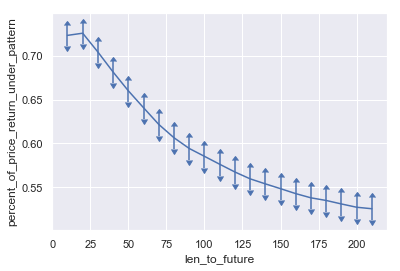

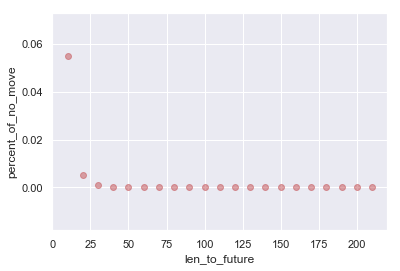

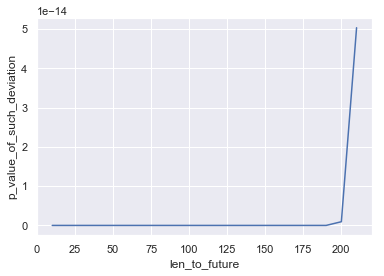

In [43]:
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
yerr = [x[1] - x[0] for x in conf_int_boarders]
plt.errorbar(future_window_list, grade_list_alltime, yerr = yerr, uplims=[x[1] for x in conf_int_boarders], lolims=[x[0] for x in conf_int_boarders], label='subsets of uplims and lolims')
plt.xlabel("len_to_future")
plt.ylabel("percent_of_price_return_under_pattern")
plt.show()
####################################################################
plt.scatter(future_window_list, no_move_alltime, c="r", alpha=0.5)
plt.xlabel("len_to_future")
plt.ylabel("percent_of_no_move")
plt.show()
#plt.scatter(future_window_list, p_value_per_future_window, c="g", alpha=0.5)
plt.plot(future_window_list, p_value_per_future_window)
plt.xlabel("len_to_future")
plt.ylabel("p_value_of_such_deviation")
plt.show()